In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [18]:
plt.rcParams.update({'font.size': 22})
name = "PQ2"

In [19]:
data = pd.read_csv(name + ".csv", names=["V", "N", "l", "t1", "t2", "t3", "t4"])

In [34]:
K = 0.2
sigma_t = 0.5
sigma_V = 0
sigma_l = 0
data["Q"] = data["V"]  / ((data["t1"] + data["t2"] + data["t3"] + data["t4"]) / 4) * (10 ** 3)
sigma_Q = 0.5
data["P"] = 9.80665 * K * data["l"] 
sigma_P = 1
X = data["Q"].values
sigma_X = sigma_Q
Y = data["P"].values
sigma_Y = sigma_P

In [35]:
A = np.vstack([X[:-3], np.ones(len(X[:-3]))]).T
k, b = np.linalg.lstsq(A, Y[:-3], rcond=None)[0]
#sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
#eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

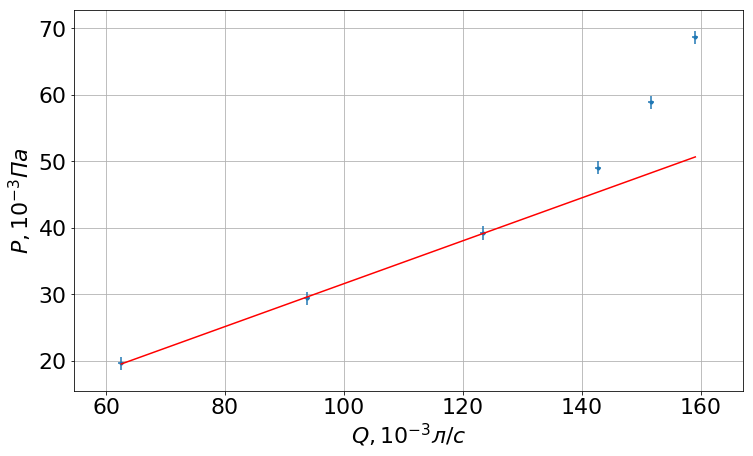

In [36]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.xlabel("$Q, 10^{-3} л/с$")
plt.ylabel("$P, 10^{-3} Па$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("../" + name + ".png")

In [37]:
k

0.32244276503515795

In [33]:
b

-0.6385257013721716

In [14]:
data = np.around(data, decimals = 2)

In [15]:
data

,V,N,l,t1,t2,t3,t4,Q,P
0,2,1,10,31.90,32.00,32.00,31.98,62.56,19.61
1,2,2,15,21.32,21.42,21.38,21.23,93.73,29.42
2,5,3,20,40.44,40.69,40.41,40.57,123.37,39.23
3,5,4,25,34.91,35.19,35.09,35.02,142.64,49.03
4,5,5,30,32.91,32.97,33.06,32.95,151.64,58.84
5,5,6,35,31.38,31.40,31.47,31.47,159.08,68.65


In [16]:
print(data.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  V &  N &   l &     t1 &     t2 &     t3 &     t4 &       Q &      P \\
\midrule
0 &  2 &  1 &  10 &  31.90 &  32.00 &  32.00 &  31.98 &   62.56 &  19.61 \\
1 &  2 &  2 &  15 &  21.32 &  21.42 &  21.38 &  21.23 &   93.73 &  29.42 \\
2 &  5 &  3 &  20 &  40.44 &  40.69 &  40.41 &  40.57 &  123.37 &  39.23 \\
3 &  5 &  4 &  25 &  34.91 &  35.19 &  35.09 &  35.02 &  142.64 &  49.03 \\
4 &  5 &  5 &  30 &  32.91 &  32.97 &  33.06 &  32.95 &  151.64 &  58.84 \\
5 &  5 &  6 &  35 &  31.38 &  31.40 &  31.47 &  31.47 &  159.08 &  68.65 \\
\bottomrule
\end{tabular}

